In [86]:
!pip install visualkeras

In [87]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout
import visualkeras
from keras.utils import plot_model

In [88]:
fashion_mnist=tf.keras.datasets.fashion_mnist

In [89]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [90]:
train_images.shape

(60000, 28, 28)

In [91]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [92]:
classes_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Sneaker','Bag','Ankle boot']

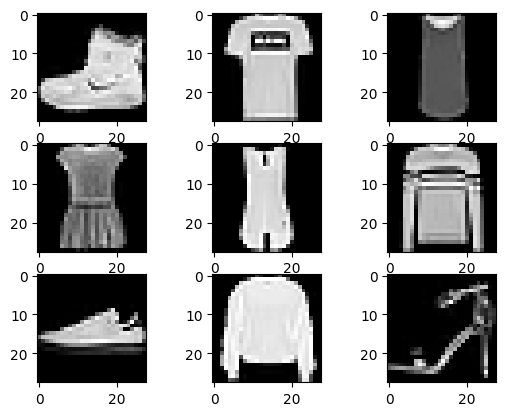

In [93]:
# plot first few images
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # plot raw pixel data
 plt.imshow(train_images[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

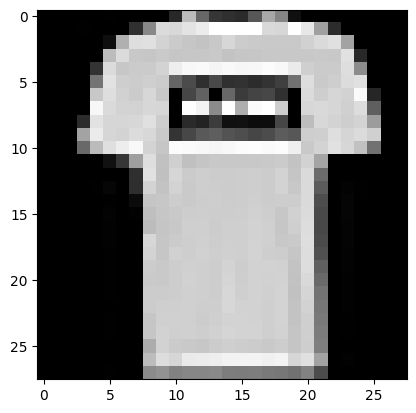

In [94]:
plt.imshow(train_images[1],cmap='gray')

In [95]:
train_images[1].shape

(28, 28)

In [96]:
train_images=train_images/255.0

In [97]:
test_images=test_images/255.0

In [98]:
#one hot encoded
from tensorflow.keras.utils import to_categorical
train_labels=to_categorical(train_labels,10)
test_labels=to_categorical(test_labels,10)

In [99]:

# We are using sequential model which is linear stack of layers. The Sequential model is initialized first and then using add method we add rest of the layers

model = tf.keras.Sequential()

# First layer, which has a 2D Convolutional layer with kernel size as 3x3 and Max pooling operation
model.add(Conv2D(32, (3,3), padding='same', input_shape=(28,28, 1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Second layer, which has a 2D Convolutional layer with kernel size as 3x3 & ReLU activation and Max pooling operation
model.add(Conv2D(64, (3,3), padding='same', activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Fully connected layer with ReLU activation function
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))

# Output layer with softmax activation function
model.add(Dense(10, activation=tf.nn.softmax))

In [100]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 3136)              0         
                                                                 
 dense_8 (Dense)             (None, 128)              

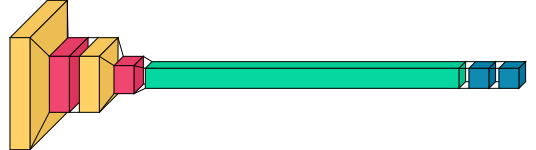

In [101]:
visualkeras.layered_view(model)

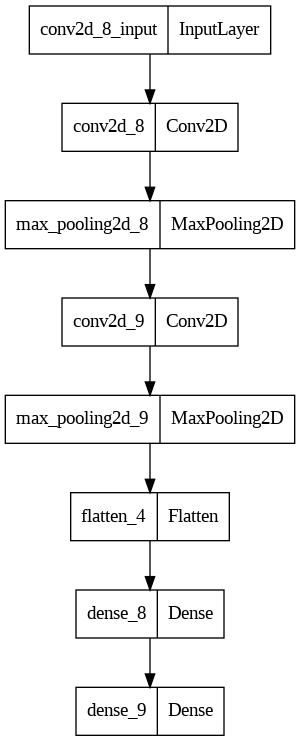

In [102]:
plot_model(model, to_file='model.png')

In [103]:
# Optimizer specified here is adam, loss is categorical crossentrophy and metric is accuracy
model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [104]:
model.fit(train_images,train_labels,epochs=10,batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 91s 48ms/step - loss: 0.4009 - accuracy: 0.8555
Epoch 2/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.2697 - accuracy: 0.9016
Epoch 3/10
1875/1875 [==============================] - 74s 40ms/step - loss: 0.2267 - accuracy: 0.9161
Epoch 4/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.1948 - accuracy: 0.9273
Epoch 5/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.1684 - accuracy: 0.9376
Epoch 6/10
1875/1875 [==============================] - 76s 41ms/step - loss: 0.1450 - accuracy: 0.9461
Epoch 7/10
1875/1875 [==============================] - 74s 40ms/step - loss: 0.1266 - accuracy: 0.9522
Epoch 8/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.1075 - accuracy: 0.9595
Epoch 9/10
1875/1875 [==============================] - 76s 41ms/step - loss: 0.0921 - accuracy: 0.9655
Epoch 10/10
1875/1875 [==============================] - 74s 40m

In [109]:
test_loss,test_Acc=model.evaluate(test_images,test_labels)

313/313 [==============================] - 4s 12ms/step - loss: 0.3289 - accuracy: 0.9140


In [110]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [111]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 8s 25ms/step


In [112]:
predictions

array([[0.08533674, 0.08533674, 0.08533674, ..., 0.08533675, 0.08533674,
        0.23196931],
       [0.08533674, 0.08533674, 0.23196931, ..., 0.08533674, 0.08533674,
        0.08533674],
       [0.08533674, 0.23196931, 0.08533674, ..., 0.08533674, 0.08533674,
        0.08533674],
       ...,
       [0.08533674, 0.08533674, 0.08533674, ..., 0.08533674, 0.23196931,
        0.08533674],
       [0.08533674, 0.23196931, 0.08533674, ..., 0.08533674, 0.08533674,
        0.08533674],
       [0.08556342, 0.08556256, 0.08556364, ..., 0.08698229, 0.08557377,
        0.08559573]], dtype=float32)